In [1]:
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim

from dlc_practical_prologue import generate_pair_sets

from modelclass import Model
from plot import *

NUMBER_ROUNDS = 10

In [2]:
class Arch1(Model):
    
    def __init__(self, f_gen_data, nb_epochs=25, mini_batch_size=100, learning_rate=1e-3):
        super().__init__(f_gen_data, "Baseline", nb_epochs, mini_batch_size, learning_rate)

        self.fc1 = nn.Linear(392, 2)

    def forward(self, x):
        nb_sample = x.size()[0]

        x = self.fc1(x.view(nb_sample, -1))
        x = F.relu(x)
        return x

In [3]:
class Arch2(Model):
    
    def __init__(self, f_gen_data, nb_epochs=25, mini_batch_size=100, learning_rate=1e-3):
        super().__init__(f_gen_data, "Baseline", nb_epochs, mini_batch_size, learning_rate)

        self.fc1 = nn.Linear(392, 2)

    def forward(self, x):
        nb_sample = x.size()[0]

        x = self.fc1(x.view(nb_sample, -1))
        x = F.relu(x)
        return x
    
    # can override parent method to use new optim
    def _train(self, train_input, train_target, train_classes):
        """ Train the model (method can be override by child class) """

        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.parameters(), self.lr)

        losses = []

        for e in range(self.epochs):
            for b in range(0, train_input.size(0), self.batch_size):
                output = self(train_input.narrow(0, b, self.batch_size))
                loss = criterion(output, train_target.narrow(0, b, self.batch_size))
                self.zero_grad()
                loss.backward()
                optimizer.step()

                losses.append(loss.data.item())

        return losses

In [4]:
model1 = Arch1(generate_pair_sets)
mResult1 = model1.train_and_test_rounds(NUMBER_ROUNDS, "CrossEntropy")

model2 = Arch2(generate_pair_sets)
mResult2 = model2.train_and_test_rounds(NUMBER_ROUNDS, "Adam")

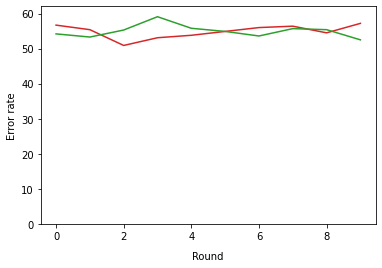

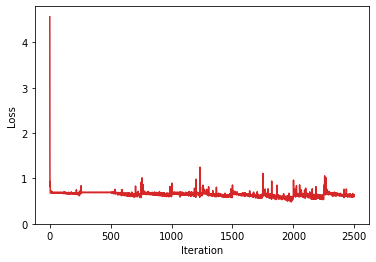

In [5]:
# plot only first model perf
plot_model_result(mResult1, NUMBER_ROUNDS)

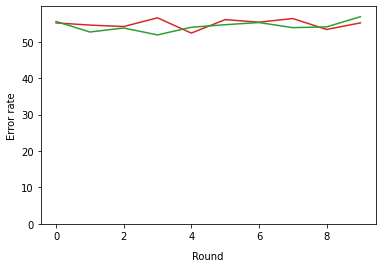

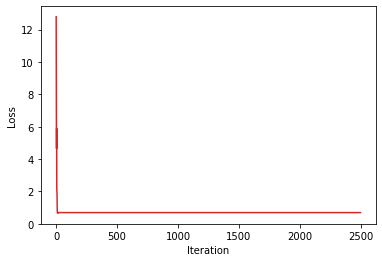

In [6]:
# plot only second model perf
plot_model_result(mResult2, NUMBER_ROUNDS)

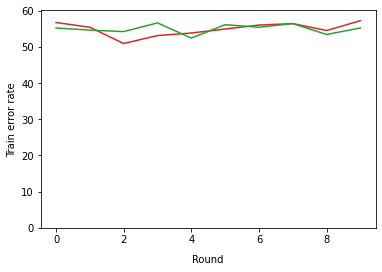

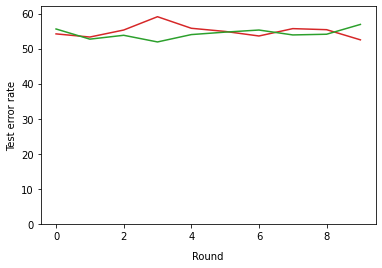

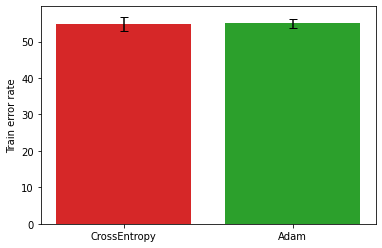

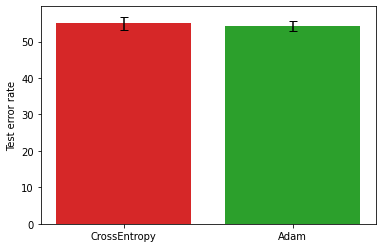

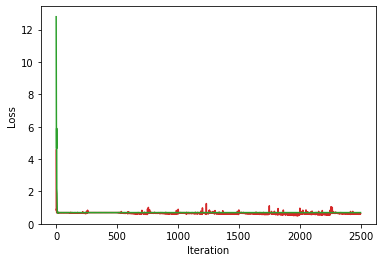

In [7]:
# compare perf
plot_models_results_comparison([mResult1, mResult2], NUMBER_ROUNDS)